In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import imdb
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense,Dropout,Embedding
from keras.layers import Conv1D,GlobalMaxPooling1D, Activation

Using TensorFlow backend.


In [2]:
(xtrain,ytrain),(xtest,ytest)=imdb.load_data(nb_words=5000)

C:\Users\wallace\Anaconda3\lib\site-packages\keras\datasets\imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


In [3]:
xtrain=sequence.pad_sequences(xtrain,maxlen=500)
xtest=sequence.pad_sequences(xtest,maxlen=500)

In [4]:
xtrain.shape,xtest.shape

((25000, 500), (25000, 500))

In [5]:
# We build CNN model

In [6]:
model=Sequential()

model.add(Embedding(5000,50, input_length=500))
model.add(Dropout(0.25))

model.add(Conv1D(500,3,padding='same',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=10,batch_size=128,validation_data=(xtest,ytest))

C:\Users\wallace\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 505s 20ms/step - loss: 0.5134 - accuracy: 0.7191 - val_loss: 0.3193 - val_accuracy: 0.8648
Epoch 2/10
25000/25000 [==============================] - 516s 21ms/step - loss: 0.2667 - accuracy: 0.8906 - val_loss: 0.2571 - val_accuracy: 0.8926
Epoch 3/10
25000/25000 [==============================] - 505s 20ms/step - loss: 0.1964 - accuracy: 0.9244 - val_loss: 0.2629 - val_accuracy: 0.8913
Epoch 4/10
25000/25000 [==============================] - 542s 22ms/step - loss: 0.1493 - accuracy: 0.9456 - val_loss: 0.2742 - val_accuracy: 0.8911
Epoch 5/10
25000/25000 [==============================] - 531s 21ms/step - loss: 0.1116 - accuracy: 0.9609 - val_loss: 0.2917 - val_accuracy: 0.8888
Epoch 6/10
25000/25000 [==============================] - 565s 23ms/step - loss: 0.0899 - accuracy: 0.9674 - val_loss: 0.3352 - val_accuracy: 0.8884
Epoch 7/10
25000/25000 [==============================] 

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 50)           250000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 500)          75500     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [8]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [9]:
sns.set()

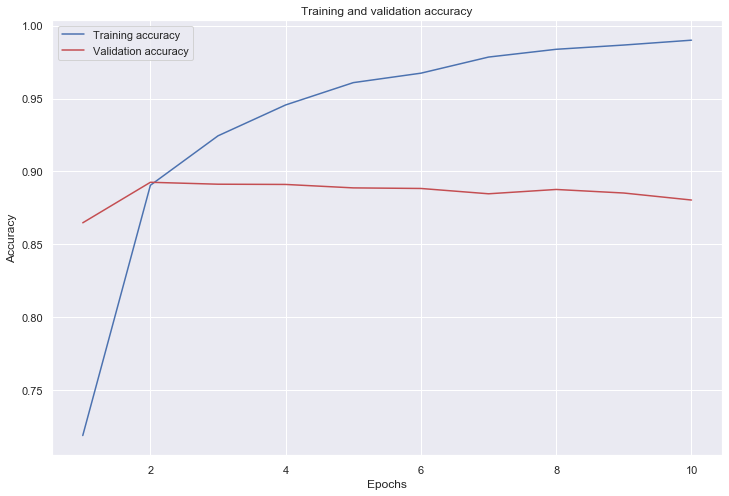

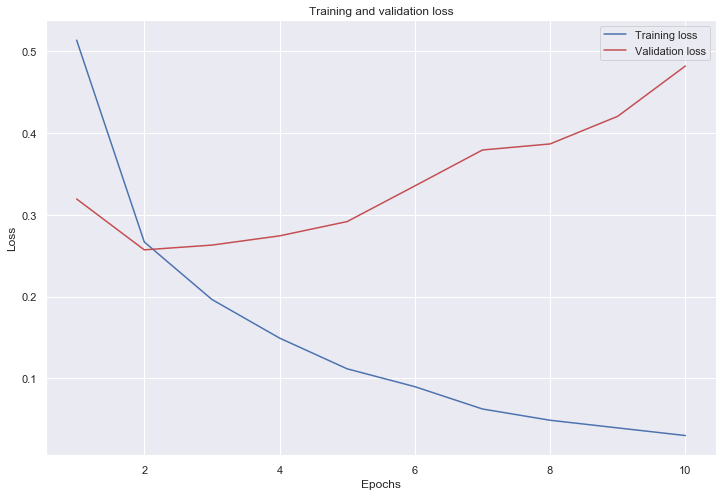

In [10]:
plt.figure(figsize=(12,8))
def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(accuracy) + 1)
    
    # Plot accuracy  
    plt.figure(1)
    plt.plot(epochs, accuracy, 'b', marker='o', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r',  marker='o',label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.figure(figsize=(12,8))
    plt.figure(2)
    plt.plot(epochs, loss, 'b', marker='o', label='Training loss')
    plt.plot(epochs, val_loss, 'r',  marker='o', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)
